In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **1. Datasets - identifying data mining tasks**

**a) Select one dataset**

The selected dataset is **[Hotel Reservations Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)**

In [ ]:
#Reading dataset
df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")
df.head()

**b) Describe the dataset**

In [11]:
# 1) The number and types of attributes
df.shape

(36275, 19)

In [12]:
#showing information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**2) Distribution of the instances per classes**

In [25]:
class_distribution = df['booking_status'].value_counts()
print("Distribution of instances per class 'booking_status': ", class_distribution)

Distribution of instances per class 'booking_status':  Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


In [22]:
class_distribution = df['type_of_meal_plan'].value_counts()
print("Distribution of instances per class 'type_of_meal_plan': ", class_distribution)

Distribution of instances per class 'type_of_meal_plan':  Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


In [23]:
class_distribution = df['room_type_reserved'].value_counts()
print("Distribution of instances per class 'room_type_reserved': ", class_distribution)

Distribution of instances per class 'room_type_reserved':  Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


In [24]:
class_distribution = df['market_segment_type'].value_counts()
print("Distribution of instances per class 'market_segment_type': ", class_distribution)

Distribution of instances per class 'market_segment_type':  Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


In [ ]:
class_distribution = df['market_segment_type'].value_counts()
print("Distribution of instances per class 'market_segment_type': ", class_distribution)

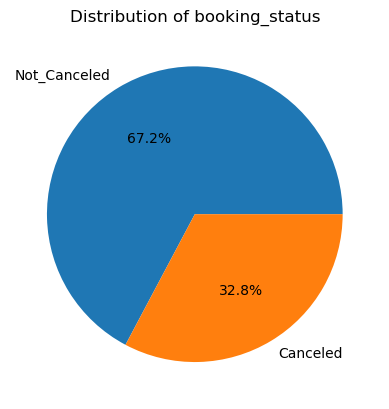

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

# Extract the column to be used in the pie chart
column_name = 'booking_status'
column_values = df[column_name].value_counts()

# Create a pie chart
plt.pie(column_values, labels=column_values.index, autopct='%1.1f%%')
plt.title(f'Distribution of {column_name}')
plt.show()

**c) Summarize each of the attributes:**

In [15]:
# For numerical attributes
numerical_attributes = df.describe()
print(numerical_attributes)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     8

In [16]:
# For categorical attributes
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print("\nColumn: ", column)
    print("Number of distinct values: ", df[column].nunique())
    print("Mode: ", df[column].mode().values[0])


Column:  Booking_ID
Number of distinct values:  36275
Mode:  INN00001

Column:  type_of_meal_plan
Number of distinct values:  4
Mode:  Meal Plan 1

Column:  room_type_reserved
Number of distinct values:  7
Mode:  Room_Type 1

Column:  market_segment_type
Number of distinct values:  5
Mode:  Online

Column:  booking_status
Number of distinct values:  2
Mode:  Not_Canceled


**d) Give an example of a data mining task which can be solved for the dataset**

An example of a data mining task that can be solved for this dataset is reservation status prediction.

By utilizing various attributes such as booking dates, lead times, customer details, and possibly others, a predictive model can be built to classify reservations into different statuses (e.g., confirmed, cancelled, no-show). This task falls under the realm of classification, where the goal is to predict the class label (reservation status) based on the input features (attributes). 

Techniques such as decision trees, logistic regression, or neural networks can be employed for this predictive modeling task. Additionally, feature engineering and selection methods can be applied to enhance model performance and interpretability.

# **2.  Data pre-processing**